# 感知机笔记
感知机（Perceptron）是二类分类的线性分类模型，其输入为实例的特征向量，输出为实例的类别，取+1和-1二值。感知机1957年由Rosenblatt提出，是神经网络与支持向量机的基础。

## 感知机模型
定义2.1（感知机）假设输入空间（特征空间）是$x \in R^n$,输出空间是$\mathcal{Y}=\{+1,-1\}$
$$
\begin{equation}
f(x)=sign(w\cdot x+b)
\end{equation}
$$
$$
\begin{equation}
sign(x)=
\begin{cases}
+1, & x \ge 0 \\
-1, & x \lt 0
\end{cases}
\end{equation}
$$

## 感知机学习策略
### 数据的线性可分析
### 感知机学习策略
假设超平面$S$的误分类点集合为M，那么所有误分类点到超平面S的总距离为
$$
-\frac{1}{\Vert w \Vert}\sum_{x_i \in M}y_i(w \cdot x_i+b)
$$
感知机$sign(w\cdot x+b)$的损失函数定义为
$$
L(w,b)=-\sum_{x_i \in M}y_i(w \cdot x_i+b)
$$
### 感知器学习算法
随机梯度下降法（stochastic gradient descent)
输入：训练数据集$T=\{(x_1,y_1),(x_2,y_2),\ldots,(x_N,y_N)\}$，其中$\mathcal{Y}=\{-1,+1\}$,学习率$\eta(0\lt \eta \le 1)$  
输出：$w,b$;感知机模型$f(x)=sign(w\cdot x+b)$
1. 选取初值$w_0,b_0$
2. 在训练集中选取数据$(x_i,y_i)$
3. 如果$y_i(w\cdot x_i+b) \le 0$
4. 转至第2步，直到训练集中没有误分类点。
$$
w \gets w+\eta y_i x_i \\
b \gets b+\eta y_i
$$

直观感觉为什么可行？不妨设$(x_i,y_i)$为误分类点
$$
\begin{eqnarray*}
y_i(w_{t+1}x_i+b_{t+1}) & = &y_i((w_t+\eta y_i x_i)x_i+b_t+\eta y_i) \\
 & = &y_i(w_t+b_t)+\eta y_i^2 x_i^2+ \eta y_i^2 \\
 & \ge & y_i(w_t+b_t)
\end{eqnarray*}
$$
可见$y_i(w_{t+1}x_i+b_{t+1})$是递增的，最终会大于0，即正确分类。

## 实例
假设**TargetFunc**就是目标函数$f(x)=sign(w \cdot x+b)$,其中$w=(-0.8,0.6),b=-10.5$。  


In [18]:
def targetFunc(x):
    return -0.8*x[0]+0.6*x[1]-10.5
def revFunc(x):
    return (0.8*x+10.5)/0.6

我们根据目标函数来随机生成一部分训练数据集T，其中$N=100$  

In [2]:
import numpy as np
x1=np.random.randint(0,100,size=100)
x2=np.random.randint(0,100,size=100)
y=np.array([targetFunc((a,b)) for a,b in zip(x1,x2)])
c=np.where(y>0,'b','r')
print 'x1:',x1
print 'x2:',x2
print 'y:', y
print 'color:',c

x1: [ 5 52 90 32  3 23  7 23 16 66 66  5  5 23 91  3 65 28 15 29 18 83 17 67 40
 15 49 46 85 79 61 24 81 79 40 82 26  9  2  7 61 77 95 77 52 49 43 14 87  8
 12 50 29 90 99 50 15 56 91 76 14  7 47 36 32 92 47 93  3  1 34 95 73 47 59
 86 39 60 63 80 72 20 82 36 46 77 17 68 80 57 31 50 67 49 79 59 35 48 40 23]
x2: [34 70 57 49 80 15 87 29 23 66 78 76 17 60 54 56 71 87 41 38 83 54 81 19  6
 16 96 52  7 55 21 85  7 38 28  8 28 34 93 61 96 96 47  9 87  2 74 30 53 43
 90 26 47  7 35 84 80 40 88 89 68 35 96 74 91 30 98 27 55 10 67 94 31 15 27
 51 64 29 15 64 16 94 56 60 19 87 95 17 78 40 42 21 51 73 32 32 33 37 99 27]
y: [  5.9 -10.1 -48.3  -6.7  35.1 -19.9  36.1 -11.5  -9.5 -23.7 -16.5  31.1
  -4.3   7.1 -50.9  20.7 -19.9  19.3   2.1 -10.9  24.9 -44.5  24.5 -52.7
 -38.9 -12.9   7.9 -16.1 -74.3 -40.7 -46.7  21.3 -71.1 -50.9 -25.7 -71.3
 -14.5   2.7  43.7  20.5  -1.7 -14.5 -58.3 -66.7   0.1 -48.5  -0.5  -3.7
 -48.3   8.9  33.9 -34.9  -5.5 -78.3 -68.7  -0.1  25.5 -31.3 -30.5 -17.9
  19.1   4.9  

通过matplotlib利用图像展示数据和目标函数

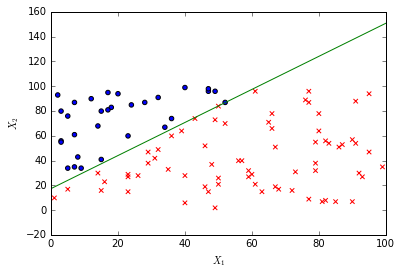

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn
#seaborn.set()

plt.scatter(x1[y>0],x2[y>0],c=c[y>0],marker='o')
plt.scatter(x1[y<0],x2[y<0],c=c[y<0],marker='x')
plt.plot([0,100],[revFunc(0),revFunc(100)],'g-')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.xlim(0,100)
#plt.ylim(-10,100)
plt.show()

In [4]:
n=x1.shape[0]
X=np.zeros((n,2))
X[:,0]=x1
X[:,1]=x2
Y=np.where(y>0,1,-1)


## 利用scikit-learn进行求解

In [5]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(X,y)
print clf.coef_
print clf.intercept_

[-0.8  0.6]
-10.5


## 通过自己编程实现

In [19]:
def gradientDescent(x,y,eta):
    limitCount=100000000
    n=x.shape[0]
    d=x.shape[1]
    count=0
    success=0
    w=np.zeros(d)
    w=w.astype(float)
    b=0.0
    while True:
        i=count % n
        row=x[i]
        res=np.dot(w,row)+b
        if res*y[i] <=0:
            w=w+eta*y[i]*row
            b=b+eta*y[i]
            success=0
        count=count+1
        success=success+1
        if success>=n:
            L2=np.sqrt(np.sum(w*w))
            return (w/L2,b/L2,count)
        if count>=limitCount: 
            L2=np.sqrt(np.sum(w*w))
            return (w/L2,b/L2,count)
  

利用随机梯度下降算法求解

In [7]:
w,b,count=gradientDescent(X,Y,2)
print w
print b
print count

[-0.82870941  0.55967911]
-5.59679111293
372246


## 展示算法结果

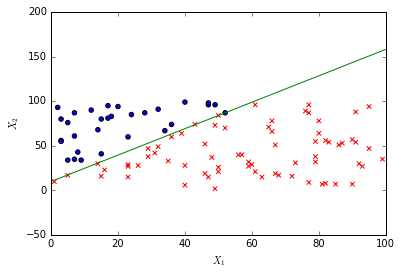

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn
#seaborn.set()

plt.scatter(x1[y>0],x2[y>0],c=c[y>0],marker='o')
plt.scatter(x1[y<0],x2[y<0],c=c[y<0],marker='x')
yL=(-w[0]*0-b)/w[1]
yR=(-w[0]*100-b)/w[1]
plt.plot([0,100],[yL,yR],'g-')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.xlim(0,100)
#plt.ylim(-10,100)
plt.show()

## 比较$\eta$参数对于求解效率的影响

In [21]:
etas=np.arange(0.1,2.0,0.1)
counts=np.zeros(len(etas))
for i in range(len(etas)):
    w,b,counts[i]=gradientDescent(X,Y,etas[i])

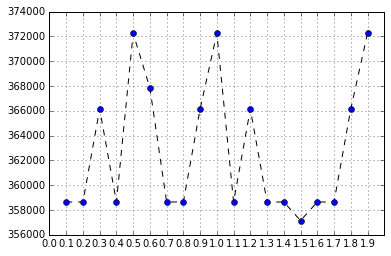

In [22]:
plt.plot(etas,counts,'k--')
plt.plot(etas,counts,'bo')
plt.xticks(np.arange(0,2,0.1))
plt.grid(True)
plt.show()

## 严格的数学证明
1. 存在满足条件$\left\| \hat{w}_{opt} \right\|=1$的超平面$\hat{w}_{opt} \cdot \hat{x}=0$将训练数据集完全正确的分开；且存在$\gamma>0$,对于所有的$i=1,2,\ldots,N$
$$
y_i(\hat{w}_{opt} \cdot \hat{x}_i) \ge \gamma
$$
2. 令$R=\max \limits_{1 \le i \le N}\left \| x_i \right \|$，则感知器学习算法在训练数据集上的误分类次数k满足不等式
$$
k \le \left( \frac{R}{\gamma} \right)^2
$$

感知器学习算法从$\hat{w}_0=0$开始
$$
\begin{eqnarray*}
w_k &=&w_{k-1}+\eta y_i x_i \\
w_k \cdot w_{opt} &=& w_{k-1} \cdot w_{opt} + \eta y_i w_{opt} \cdot x_i \\
& \ge & w_{k-1} \cdot w_{opt} +\eta \gamma
\end{eqnarray*}
$$

由此递推出
$$
\begin{eqnarray}
w_k \cdot w_{opt} \ge k \eta \gamma
\end{eqnarray}
$$


发生第k个误分类实例的条件是
$$
y_i(w_{k-1} \cdot x_i) \le 0
$$
则
$$
\begin{eqnarray*}
\left \| w_k \right \|^2 &=&{\left \| w_{k-1} \right \|}^2 + 2*\eta y_i w_{k-1} \cdot x_i + {\eta}^2\left \| x_i \right \|^2\\
& \le & {\left \| w_{k-1} \right \|}^2 +{\eta}^2\left \| x_i \right \|^2\\
& \le & {\left \| w_{k-1} \right \|}^2 +{\eta}^2R^2\\
\left \| w_k \right \|^2 & \le & k {\eta}^2R^2
\end{eqnarray*}
$$

结合上面两个结果
$$
k \eta \gamma \le w_k \cdot w_{opt} \le \sqrt{k}\eta R
$$

于是
$$
k \le \left( \frac{R}{\gamma} \right) ^2
$$